# Introduction to Topic Modeling
## Day 1: The Basics
---
---

## Learning goals

* Think through how and why you might use topic modeling in a text analysis project
* Implement a basic topic modeling algorithm and learn how to tweak it
* Understand the intuitions behind `Latent Dirichlet Allocation` (LDA) for topic modeling
* Get familiar with (some of) Python's versatile `scikit-learn` library
* Get familiar with the `Pandas` package and manipulating data
* Learn how to prepare a `Document-Term Matrix` (DTM), why this is useful, and what "bag of words" means


## Outline
- [The 'what' and 'why' of topic modeling](#whatwhy)
    - [How LDA works (briefly)](#mechanics)
- [How to join in with coding](#joinin)
- [The Pandas dataframe: Children's literature](#data)
    - [Exploratory data analysis](#explore)
- [Text preprocessing](#preprocess)
- [Train a topic model with LDA](#train)
- [Document-by-topic distribution](#topics)
- [LDA as dimensionality reduction](#dimensions)


## Key terms
* *document-term matrix (DTM)*:
    * a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In a DTM, rows correspond to documents in the collection and columns correspond to terms. Making a DTM is a common preprocessing step: it takes in tokenized texts and makes them ready for downstream tasks (e.g., topic models, supervised machine learning models).
* *topic modeling*:
    * A statistical model to uncover abstract topics within a text. It uses the co-occurrence fo words within documents, compared to their distribution across documents, to uncover these abstract themes. The output is a list of weighted words, which indicate the subject of each topic, and a weight distribution across topics for each document.
* *Latent Dirichlet Allocation (LDA)*:
    * A popular implementation of topic modeling that assumes a Dirichlet prior. It estimates a distribution of documents over topics and a distribution of words over topics. It does not take document order into account (unlike some others topic modeling algorithms).
* *unsupervised text analysis*:
    * Learning patterns or structure in text data through the associations of linguistic units (e.g., word co-associations). Uses include discovering latent clusters or dimensions, reducing dimensionality, outlier detection, and probability density estimation.

## The 'what' and 'why' of topic modeling <a id='whatwhy'></a>

Topic modeling is a _distant reading_ technique for finding structure in large collections of text, without actually reading everything by eye. If you have hundreds or thousands of documents and want to understand roughly what your corpus contains, then topic modeling may be for you.

A topic modeling program finds the words that appear frequently together in a document and groups them together to form **topics**, which are mixtures of words that characterize the document's themes or underlying ideas. Topic modeling is a kind of _unsupervised machine learning_ that learns what topics characterize a corpus based on word co-associations within and across documents.

Topic modeling may be used to support different approaches to large text corpora, such as:

* Survey a collection that is too big to read closely, e.g. [Computational Historiography: Data Mining in a Century of Classics Journals](http://www.perseus.tufts.edu/publications/02-jocch-mimno.pdf) (PDF)
* Look at thematic trends over time in an archive, e.g. [Topic Modeling Martha Ballard's Diary](http://www.cameronblevins.org/posts/topic-modeling-martha-ballards-diary/)
* Create metadata for an archive to improve accessibility, e.g. [Topic modeling for the valorisation of digitised archives of the European Commission](https://ieeexplore.ieee.org/abstract/document/7840981)
* Understand current trends in social media relevant to your discipline, e.g. [Mining the Open Web with ‘Looted Heritage’](https://electricarchaeology.ca/2012/06/08/mining-the-open-web-with-looted-heritage-draft/)

As a simple example, one topic of this [Wikipedia article on black holes](https://en.wikipedia.org/wiki/Black_hole) is:

* black, hole, mass, star

![First picture of a supermassive black hole, captured in 2019](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Black_hole_-_Messier_87.jpg/320px-Black_hole_-_Messier_87.jpg "First picture of a supermassive black hole, captured in 2019")

Not too surprising, but this topic does seem accurate on the face of it. What about a document that we are less familiar with? Here is a topic of a [speech made by John F. Kennedy at Rice University in 1962](https://er.jsc.nasa.gov/seh/ricetalk.htm):

* space, new, year, man

![Charles Conrad Jr., Apollo 12 Commander, examines the unmanned Surveyor III spacecraft on the Moon](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Surveyor_3-Apollo_12.jpg/274px-Surveyor_3-Apollo_12.jpg "Charles Conrad Jr., Apollo 12 Commander, examines the unmanned Surveyor III spacecraft on the Moon")

This is Kennedy's famous 'we choose to go to the moon' speech. Notice that 'moon' is not in this topic; but the speech does cover the history of humankind's ("man's") endeavours and emphasises a forward-looking perspective (the "new"-ness of advancements).

As suggested by the simplified examples above, human intervention is still required to interpret what topics might 'mean'. Topic modeling is not magic; it is a tool that requires informed use and careful review, just like any other. Ideally, when interpreting topics we consider topics' frequent and distinctive words as well as specific cases with interesting topic loadings (i.e., example texts high in topics of interest). But just a few frequent words by topic can tell us a lot&mdash;such as this raw model output for a topic model I built on charter school websites:

<img src="../assets/topic_prevalence.png" alt="Topic model output" width="600" height="300"/>

I name the top topic "standards & assessment", the second "communication", the third "web administration", etc. What would you call the topic fourth from the top? The bottom one? 

What use is such a model? In addition to describing what topics/ideas are expressed in a text corpus, we can consider these topics' many contexts: race and class, emotions, popularity, etc. This lets us answer questions like: Which topics are less common in white charter school websites? These regression results help us answer that particular question:

<img src="../assets/topics_and_race.png" alt="Topics and race" width="600" height="300"/>

We can also look at how topics change over time, producing visuals like this one, which visualizes the topics of Trump's tweets in 2020.

<img src="../assets/trump_topics.png" alt="Trump's most frequent topics" width="1000" height="500"/>

### How LDA works (briefly) <a id='mechanics'></a>

We'll implement the original and simplest topic modeling algorithm, Latent Dirichlet Allocation (or LDA), using Python's scikit-learn. There is a lot to learn about topic modeling, but the focus here is giving you starter code you can expand on later. To give a little more mathematical context, though, here are the mechanics of this version of topic modeling. 

LDA is a generative model&mdash;a model of the data-generating process&mdash;in which documents are mixtures of topics and topics are probability distributions over tokens in the vocabulary.$^1$ The (normalized) frequency of word $j$ in document $i$ can be written as:

$q_{ij} = v_{i1}*\theta_{1j} + v_{i2}*\theta_{2j} + ... + v_{iK}*\theta_{Kj}$

where K is the total number of topics, $\theta_{kj}$ is the probability that word $j$ shows up in topic $k$ and $v_{ik}$ is the weight assigned to topic $k$ in document $i$. The model treats $v$ and $\theta$ as generated from Dirichlet-distributed priors and estimates them with Maximum Likelihood or Bayesian methods.

These mechanics can be illustrated as follows:$^2$

<img src="../assets/lda_blei.png" alt="The intuitions behind LDA (Blei 2012)" width="1000" height="500"/>

$^1$ Blei, D. M., A. Y. Ng, and M. I. Jordan (2003). Latent Dirichlet allocation. _Journal of Machine
Learning Research_ 3, 993–1022. <br/>
$^2$ Blei, D. M. (2003) Probabilistic Topic Models. _Communications of the ACM_ 55, 77–84.

---
---

## How to join in with coding <a id='joinin'></a>

* **Edit** any cell and try changing the code, or delete it and write your own.

* Before running a cell, think through the code and try to **guess** what output you'll get.

* If you encounter an **error**, take a breath; this is normal. Errors happen all the time, and by reading the error message you will often learn something new and useful.

* Remember: we are in the cloud, so you cannot break the notebook or your computer: **don't be afraid to experiment!**.

**Let's get coding!**

## The Pandas dataframe: Children's literature <a id='data'></a>

As our toy dataset, let's use a database of children's literature from the 19th century. The data were compiled by students in [this course](http://english197s2015.pbworks.com/w/page/93127947/FrontPage) and have been minimally cleaned for our use. The data and other corpora can be [found here](http://dhresourcesforprojectbuilding.pbworks.com/w/page/69244469/Data%20Collections%20and%20Datasets#demo-corpora), feel free to explore that data and play with it using text analysis!

First, we read our corpus into a Pandas dataframe. The file is stored as a compressed .csv file in the `day-1/` folder, so we tell Pandas the compression type (`.bz2`) so it can unpack and read it for us.

In [2]:
import pandas as pd
import numpy as np
df_lit = pd.read_csv("../assets/childrens_lit.csv.bz2", 
                     sep='\t', 
                     index_col=0, 
                     encoding = 'utf-8', 
                     compression='bz2')

#drop rows where the text is missing.
df_lit = df_lit.dropna(subset=['text'])

#view the dataframe
df_lit

,title,author gender,year,text
0,A Dog with a Bad Name,Male,1886,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...
1,A Final Reckoning,Male,1887,A Final Reckoning: A Tale of Bush Life in Aust...
2,"A House Party, Don Gesualdo, and A Rainy June",Female,1887,A HOUSE-PARTY Don Gesualdo and A Rainy June...
3,A Houseful of Girls,Female,1889,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ..."
4,A Little Country Girl,Female,1885,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ..."
...,...,...,...,...
127,Up the River,Male,1881,UP THE RIVER OR YACHTING ON THE MISSISSIPPI ...
128,What Katy Did Next,Female,1886,WHAT KATY DID NEXT BY SUSAN COOLIDGE This...
129,Winning His Spurs,Male,1882,WINNING HIS SPURS ...
130,With Clive in India,Male,1884,"WITH CLIVE IN INDIA: Or, The Beginnings of an..."


### Explore the data <a id='explore'></a>

Let's look at some descriptive statistics about this dataset, to get a feel for what's in it and check for any visible errors. This will help with interpreting the data and knowing what kinds of questions to ask. 

The first thing most people do is to `describe` their data. (This is the `summary` command in R, or the `sum` command in Stata).

In [3]:
#There's only one numeric column in our data ('year'), so we only get one column for output.
df_lit.describe()

,year
count,127.000000
mean,1885.110236
std,2.752281
min,1880.000000
25%,1883.000000
50%,1886.000000
75%,1887.000000
max,1889.000000


<AxesSubplot:>

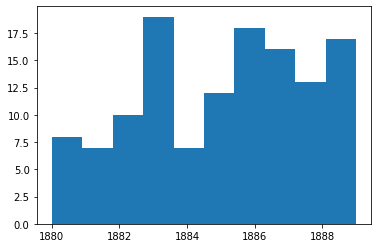

In [4]:
#Visualize the distribution of the 'year' column
import matplotlib
df_lit['year'].hist(
    bins = 10, 
    grid=False)

What's the breakdown of author genders in this dataset?

In [5]:
#We can count this using the value_counts() function
df_lit['author gender'].value_counts()

Male      99
Female    28
Name: author gender, dtype: int64

In [6]:
#This only gets us numerical summaries. To get summaries of some of the other columns, we can explicitly ask for it.
df_lit.describe(include=['O'])

,title,author gender,text
count,127,127,127
unique,127,2,127
top,A Dog with a Bad Name,Male,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...
freq,1,99,1


What kind of titles do these books have?

In [7]:
df_lit['title'].value_counts().head(10)

A Dog with a Bad Name                            1
The Cornet of Horse                              1
The Lion of Saint Mark                           1
The Life of a Ship                               1
The Land of Mystery                              1
The Island Queen                                 1
The Happy Prince and Other Stories               1
The Gold of Fairnilee                            1
The Giant of the North Pokings Round the Pole    1
The Fugitives the Tyrant Queen of Madagascar     1
Name: title, dtype: int64

What is the average year for each author gender? To answer this question, we use the powerful `groupby` function in Pandas. (Similar to `collapse` on Stata)

In [8]:
books_grouped_by_gender = df_lit.groupby("author gender")
books_grouped_by_gender['year'].mean().sort_values(ascending=False)

author gender
Female    1885.250000
Male      1885.070707
Name: year, dtype: float64

## Text preprocessing <a id='preprocess'></a>

>**The key to understanding Natural Language Processing (NLP) is that the computer can only do computations on _numbers_. We have to present our corpus for analysis in a numerical form&mdash;typically _vectors_&mdash;and make human sense of everything at the end.**

A "bag of words" corpus is the _vocabulary_ of tokens (words) in the corpus together with some _measure_ of how often they occur. The measurement may be:
* binary (presence or absence)
* count (how many times the token occurs)
* frequency (count divided by the total number of tokens).

This is called a "bag of words" because the order and location of words is discarded. For example, it doesn't matter if the words 'red' and 'nose' are adjacent ('red nose'), or at the beginning or end of a sentence; this approach just treats the words individually. It's like a 'bag' of Scrabble™ tiles, where each tile is a word, all rattling around together in no particular order. It looks like this:

<img src="../assets/bag_of_words.png" alt="Bag of words" width="800" height="300"/>

To represent a corpus as a bag of words for topic modeling applications and the like, a common preprocessing step is to create a Document-Term Matrix (DTM). A DTM is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In a DTM, rows correspond to documents in the collection and columns correspond to terms. In other words, each document becomes a _vector_ of word frequencies with a value for the count of each word in that document. This is also called Term Frequency (TF) weighting, representing each text by its word counts&mdash;probably the most straightforward method of preparing text data.

To turn our texts into numbers in the form of a DTM, let's use the `CountVectorizer` function from `scikit-learn` ([more info here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)). This is a standard method of using DTM in Python.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize our text using CountVectorizer
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=50,
                                max_features=None,
                                stop_words='english')

dtm = tf_vectorizer.fit_transform(df_lit.text)
print("Done!")

Extracting tf features for LDA...
Done!


Let's take a look at the DTM we just made.

In [10]:
print(dtm)

  (0, 547)	11
  (0, 2865)	14
  (0, 2426)	10
  (0, 1903)	2
  (0, 2434)	7
  (0, 2964)	3
  (0, 1742)	10
  (0, 852)	4
  (0, 460)	2
  (0, 931)	1
  (0, 2875)	13
  (0, 1899)	4
  (0, 1980)	3
  (0, 2329)	8
  (0, 2214)	5
  (0, 2181)	15
  (0, 1679)	2
  (0, 504)	2
  (0, 2712)	4
  (0, 2154)	2
  (0, 2635)	6
  (0, 169)	2
  (0, 1969)	9
  (0, 628)	1
  (0, 473)	6
  :	:
  (126, 227)	2
  (126, 2062)	1
  (126, 2649)	4
  (126, 1837)	6
  (126, 3079)	14
  (126, 1442)	6
  (126, 0)	4
  (126, 2391)	1
  (126, 410)	2
  (126, 1419)	1
  (126, 532)	6
  (126, 878)	1
  (126, 2978)	9
  (126, 364)	4
  (126, 810)	1
  (126, 2017)	1
  (126, 2165)	1
  (126, 157)	1
  (126, 677)	2
  (126, 1157)	1
  (126, 2828)	5
  (126, 244)	4
  (126, 555)	14
  (126, 2278)	1
  (126, 1230)	3


This format is called Compressed Sparse Format. It saves a lot of memory to store the DTM in this format, but it is difficult to look at for a human. Compressed Sparse Format stores a matrix that has lots of zeroes, and saves space by omitting the zeroes. Let's look at a sample to see what it looks like WITH the zeroes:

In [11]:
dtm.toarray()[:10,:10]

array([[0, 1, 0, 1, 0, 7, 0, 0, 1, 0],
       [0, 2, 4, 1, 1, 0, 2, 1, 2, 2],
       [0, 1, 0, 0, 0, 2, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 3, 3, 6, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 5, 0, 4, 2, 0],
       [1, 0, 0, 0, 0, 2, 1, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1]])

How do we know what each number (row) indicates in Compressed Sparse Format? We can access the words themselves through the `CountVectorizer` function `get_feature_names`. 

In [12]:
print(tf_vectorizer.get_feature_names_out()[::100]) # get every 100th word

['000' 'amuse' 'attract' 'bidding' 'bush' 'church' 'conscience' 'crying'
 'despite' 'dried' 'eve' 'female' 'freely' 'grim' 'hitting' 'indulge'
 'kissing' 'lovely' 'moonlight' 'occasionally' 'perform' 'preparations'
 'puzzle' 'remembering' 'roll' 'separate' 'slipping' 'station' 'summons'
 'threatening' 'uneasiness' 'wasn']


To illustrate the techniques in this lesson, we will first convert this matrix back to a Pandas dataframe, a format that's more intuitive to work with. For larger datasets, you will have to use the Compressed Sparse Format. 

*Note*: In practice it is rare to transform a DTM into a Pandas dataframe, because of memory issues. If using this notebook as a reference, don't just copy and paste--think about what you're doing to avoid crashing your system!

In [13]:
vocab = tf_vectorizer.get_feature_names_out() # save terms in vectorizer for later use 

long_dtm = pd.DataFrame(dtm.toarray(), 
                        columns=vocab, 
                        index=df_lit.index)
long_dtm.head()

,000,10,20,30,50,_you_,abandoned,ability,abode,abreast,...,yelling,yellow,yells,yer,yield,yielded,yonder,york,youngest,youth
0,0,1,0,1,0,7,0,0,1,0,...,1,1,2,0,0,5,1,23,1,14
1,0,2,4,1,1,0,2,1,2,2,...,1,0,2,2,0,0,0,0,0,2
2,0,1,0,0,0,2,0,1,1,0,...,0,6,0,0,0,2,3,0,1,13
3,0,0,1,0,0,3,3,6,0,0,...,1,2,0,0,1,4,0,0,7,13
4,0,0,0,0,0,0,0,0,0,1,...,0,16,0,0,1,0,1,4,3,1


**What can we do with a DTM?**

Because DTMs have a matrix format, we can perform any matrix algebra or vector manipulation on it, which enables some pretty exciting things (think vector space and Euclidean geometry). But, what do we lose when we represent text in this format? (Hint: Think "bag of words".)

For a toy example, we can use our long-format DTM to quickly identify the most frequent words.

In [14]:
long_dtm.sum().sort_values(ascending=False).head(10)

doctor     5032
dick       4857
king       4490
jack       3787
uncle      3680
tom        3199
ship       2762
project    2738
army       2735
french     2677
dtype: int64

What are the most frequent words for male and female authors?

#### TO DO: Add solution

### Challenge

* Print out the most infrequent words rather than the most frequent words. You can look at the [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats) for more information.
* Print the average number of times each word is used in a book.
* Print this out sorted from highest to lowest.

In [15]:
# your code here

In [16]:
# solution

long_dtm.sum().sort_values().head()

In [ ]:
long_dtm.mean().sort_values(ascending=False).head()

### TO DO: Add solution

## Train a topic model using LDA <a id='train'></a>

The first thing we need to do is 'train a model'. These words and concepts come from the (fashionable!) sphere of **machine learning**. A 'model' is a simplified representation of something in the real world that a computer can handle. In topic modeling, the model is a representation of the topics of the corpus.

We can say the computer acquires 'experience', or a simplified 'understanding' of what the corpus is about by creating a model of it. We have to train the computer in how to make its model by feeding it training data&mdash;in the case of topic modeling, this data is the text we are interested in.

Let's train the model using the `scikit-learn` function `LatentDirichletAllocation`. See [here](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) for more information about this function. 

In [17]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_samples = 2000
n_topics = 4
n_top_words = 50

##This is a function to print out the top words for each topic in a pretty way.
#Don't worry too much about understanding every line of this code.
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [18]:
print("Fitting LDA model with tf features, "
      "n_samples=%d and n_topics=%d..."
      % (n_samples, n_topics))

#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda = LDA(n_components=n_topics, 
          max_iter=20,
          learning_method='online',
          learning_offset=80.,
          total_samples=n_samples,
          random_state=0)
#fit the model
lda.fit(dtm)
print("Done!")

Fitting LDA model with tf features, n_samples=2000 and n_topics=4...
Done!


In [19]:
#print the top words per topic, using the function defined above.
#Unlike R, which has a built-in function to print top words, we have to write our own for scikit-learn

print("\nTopics in LDA model:")
print_top_words(lda, vocab, n_top_words)


Topics in LDA model:

Topic #0:
project doctor girls sister papa mamma london baby sweet tom street works dr remarked aunt tea youth foundation presently study em ain cousin office darling loved ladies wasn everybody public flower observed nurse ma shop snow ye queen class reader ice stairs flowers lovely agreement sisters doesn carriage bell garden

Topic #1:
dick uncle doctor er jack ain tom den yer fish em rock wolf gun rope lads ha birds rocks beneath ay stream shock tail moments mate excitedly garden eh sand fishing thrust ye nay gazing softly mountain ship tremendous hook bird leg ashore growled penny shore stones farther jump knife

Topic #2:
king army french troops camp attack officers prince ship john soldiers city village officer guns rode shore regiment march tom fort wounded british boats sword advanced castle jack james indian band marched native prisoners ships arrows france numbers lads forest frank ride presently vessel fought mounted fleet column stream rear

Topic #3

Take a minute to inspect these top words. _What name would you give each of these topics?_ (This is a common task in topic modeling.)

> **❗Important Note: Topic models are not perfectly reproducible, so you may see different topics, words, and/or probabilities  from what others see. This means my examples may not match up exactly with what you see when you run the notebook.**

### Challenge

Copy and paste the above code and fit a new model, `lda_new`, by changing some of the parameters. How does this change the output?

Suggestions:
1. Change the number of topics. 
2. Do not remove stop words. 
3. Change other options, either in the vectorize stage or the LDA model.

In [20]:
#your code here

In [21]:
#solution


## Document by Topic Distribution <a id='topics'></a>

One thing we may want to do with the output is find the most representative texts for each topic. A simple way to do this (but not memory efficient) is to merge the topic distribution back into the Pandas dataframe.

First get the topic distribution array.

In [22]:
topic_dist = lda.transform(dtm)
topic_dist

array([[9.27993669e-01, 1.43700382e-02, 5.76027691e-02, 3.35234006e-05],
       [2.73383488e-02, 7.01313231e-02, 4.91328141e-01, 4.11202187e-01],
       [9.72301526e-01, 3.66126075e-05, 2.25981325e-02, 5.06372922e-03],
       [9.99907351e-01, 3.06661128e-05, 3.10550012e-05, 3.09277922e-05],
       [9.69292227e-01, 2.88828433e-02, 6.05477628e-05, 1.76438162e-03],
       [9.02818435e-01, 9.70583246e-02, 6.16743414e-05, 6.15656757e-05],
       [4.10396600e-01, 5.86307314e-01, 1.35979768e-04, 3.16010688e-03],
       [9.99890902e-01, 3.60980543e-05, 3.67128035e-05, 3.62872482e-05],
       [2.46371338e-01, 2.56589766e-01, 4.50088248e-01, 4.69506480e-02],
       [7.08481800e-05, 3.81086663e-01, 6.18771825e-01, 7.06641686e-05],
       [6.19417246e-02, 5.60865999e-02, 8.81890242e-01, 8.14334923e-05],
       [5.50253267e-05, 5.59319821e-05, 5.52375701e-05, 9.99833805e-01],
       [1.54941895e-01, 8.53067338e-05, 1.95440934e-01, 6.49531864e-01],
       [8.16413872e-01, 6.08089939e-02, 1.22708631e

Merge back in with the original dataframe:

In [23]:
topic_dist_df = pd.DataFrame(topic_dist)
df_w_topics = topic_dist_df.join(df_lit)
df_w_topics

,0,1,2,3,title,author gender,year,text
0,0.927994,0.014370,0.057603,0.000034,A Dog with a Bad Name,Male,1886.0,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...
1,0.027338,0.070131,0.491328,0.411202,A Final Reckoning,Male,1887.0,A Final Reckoning: A Tale of Bush Life in Aust...
2,0.972302,0.000037,0.022598,0.005064,"A House Party, Don Gesualdo, and A Rainy June",Female,1887.0,A HOUSE-PARTY Don Gesualdo and A Rainy June...
3,0.999907,0.000031,0.000031,0.000031,A Houseful of Girls,Female,1889.0,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ..."
4,0.969292,0.028883,0.000061,0.001764,A Little Country Girl,Female,1885.0,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ..."
...,...,...,...,...,...,...,...,...
122,0.000047,0.000047,0.000048,0.999858,Treasure Island,Male,1883.0,TREASURE ISLAND by Robert Louis Stevenson ...
123,0.960205,0.000054,0.005191,0.034551,Twice Bought,Male,1885.0,"The Project Gutenberg EBook of Twice Bought, b..."
124,0.000026,0.000025,0.999923,0.000026,Two Arrows,Male,1886.0,TWO ARROWS HARPER'S YOUNG PEOPLE'S SERIES...
125,0.000020,0.000020,0.999940,0.000020,Uncle Remus: His Songs and Sayings,Male,1880.0,Uncle Remus: His Songs and His Sayings By Joe...


Now we can sort the dataframe for the topic of interest, and view the top documents for the topics.
Below we sort the documents first by Topic 0 (looking at the top words for this topic I think it's about family, health, and domestic activities), and next by Topic 1 (again looking at the top words I think this topic is about children playing outside in nature). These topics may be a family/nature split?

Look at the titles for the two different topics. Look at the gender of the author. Hypotheses?

In [24]:
print(df_w_topics[['title', 'author gender', 0]].sort_values(by=[0], ascending=False))

                                  title author gender         0
85                                  NaN           NaN  0.999914
3                   A Houseful of Girls        Female  0.999907
97                   The Life of a Ship          Male  0.999903
100   The Little Princess of Tower Hill        Female  0.999898
7                      A World of Girls        Female  0.999891
..                                  ...           ...       ...
24                     Dick o' the Fens          Male  0.000022
111                The Thorogood Family          Male  0.000021
33                       For the Temple          Male  0.000021
125  Uncle Remus: His Songs and Sayings          Male  0.000020
49                            Menhardoc          Male  0.000019

[127 rows x 3 columns]


In [25]:
print(df_w_topics[['title', 'author gender', 1]].sort_values(by=[1], ascending=False))

                                  title author gender         1
24                     Dick o' the Fens          Male  0.999933
53                      My Friend Smith          Male  0.999922
19                          Bunyip Land          Male  0.999919
48               Little Lord Fauntleroy        Female  0.999916
114             The Willoughby Captains          Male  0.999896
..                                  ...           ...       ...
126                  Under Drake's Flag          Male  0.000022
111                The Thorogood Family          Male  0.000021
33                       For the Temple          Male  0.000021
76                        The Big Otter          Male  0.000021
125  Uncle Remus: His Songs and Sayings          Male  0.000020

[127 rows x 3 columns]


### Challenge

- What is the average topic weight by author gender, for each topic?
- Which topic is most represented in texts by women? Most represented in texts by men?
- Which topic is least represented in texts by women? Least represented in texts by men?
- Graph these results.

Hint 1: Consider using the python `range` function and a for-loop to create a list of topic indices and inspect average topic weights. This code block gets that started for you.

In [26]:
topic_columns = range(0,4)
for num in topic_columns:
    print(num)

0
1
2
3


Hint 2: Use a Pandas `groupby()` to compare the topic loadings of Male and Female authors.

In [27]:
#your code here

In [28]:
#solution
grouped = df_w_topics.groupby("author gender")
for num in topic_columns:
    print(num)
    print(grouped[num].mean())

0
author gender
Female    0.653199
Male      0.323377
Name: 0, dtype: float64
1
author gender
Female    0.127721
Male      0.189827
Name: 1, dtype: float64
2
author gender
Female    0.157666
Male      0.326972
Name: 2, dtype: float64
3
author gender
Female    0.061414
Male      0.159824
Name: 3, dtype: float64


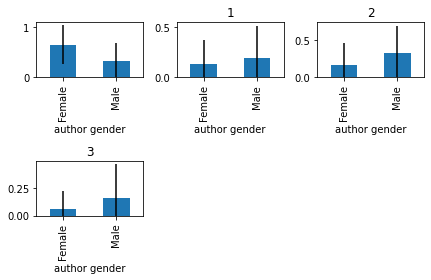

In [29]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
chrt = 0
for num in topic_columns:
    chrt += 1 
    ax = fig1.add_subplot(2,3, chrt)
    grouped[num].mean().plot(
        kind = 'bar', 
        yerr = grouped[num].std(), 
        ylim=0, ax=ax, title=num)

fig1.tight_layout()
plt.show()

## LDA as dimensionality reduction <a id='dimensionality'></a>

Another use for topic modeling is to reduce the dimensionality of text. Instead of representing a document as a vector of token counts over the whole vocabulary (which may be very large), topic modeling can represent that document as a weighted average of _k_ topics over a finite number of (more or less) interpretable topics. The latter approach is usually more tractable for subsequent statistical analysis (linear regression, decision trees, transformers, etc). 

Now that we obtained a distribution of topic weights for each document, we can represent our corpus with a dense document-weight matrix as opposed to our initial sparse DTM. The weights can then replace tokens as features for any subsequent task (classification, prediction, etc). A simple example may consist in measuring cosine similarity between documents. For instance, which book is closest to the first book in our corpus? Let's use pairwise cosine similarity to find out. 

NB: cosine similarity measures an angle between two vectors, which provides a measure of distance robust to vectors of different lenghts (total number of tokens)

First, let's create a sparse DTM.

In [75]:
dtm = tf_vectorizer.fit_transform(df_lit['text'])

Next let's import the `cosine_similarity` function from `sklearn` and print the cosine similarity between the first and second book or the first and third book. Let's use the built-in `time` function to tell us how long this takes.

In [149]:
from sklearn.metrics.pairwise import cosine_similarity
import time

start = time.time()
print("Cosine similarity between first and second book: ", 
      str(cosine_similarity(dtm[0,:], dtm[1,:])))
print("Cosine similarity between first and third book: ", 
      str(cosine_similarity(dtm[0,:], dtm[2,:])))
end = time.time()

print()
print("Computing the above code took " + str(end-start) + " seconds.")

Cosine similarity between first and second book:  [[0.28012828]]
Cosine similarity between first and third book:  [[0.40808192]]

Computing the above code took 0.012564659118652344 seconds.


What if we use the topic weights instead of word frequencies? Would this get similar results, and would it be faster? 

To try this out, it's more straightforward to calculate cosine similarity with the `spatial` function from `scipy`.

In [150]:
from scipy import spatial

dwm = df_w_topics.iloc[:,:4] # limit docs/topics DF to only topic weights

start = time.time()
print("Cosine similarity between first and second book: ", 
      str(1-spatial.distance.cosine(dwm.iloc[0,:], dwm.iloc[1,:])))
print("Cosine similarity between first and third book: ", 
      str(1-spatial.distance.cosine(dwm.iloc[0,:], dwm.iloc[2,:])))
end = time.time()

print()
print("Computing the above code took " + str(end-start) + " seconds.")

Cosine similarity between first and second book:  0.09117452962871253
Cosine similarity between first and third book:  0.9991170178858493

Computing the above code took 0.0049397945404052734 seconds.


It looks like using topic weights to compute similarities between a few documents took less than half the time than did using word frequencies. 

### Challenge

Calculate the cosine similarity between the first book and all other books. What is the most similar book to the first one?

_Hint 1:_ Use the `df.iterrows()` method to iterate over all rows in the document/topic weights DataFrame we just made. 

_Hint 2:_ To store the similarities, consider using a Python dictionary&mdashthat is, a list of key-value pairs. `max()` will get you the highest entry in the dictionary, and `dict.values()` will get you the dictionary values.

In [ ]:
# your code here

In [167]:
# solution
first_book = dwm.iloc[0,:] # separate out topic weights for first book

similarities = {} # initialize dictionary

print("Computing similarities...")
for book_idx, row in dwm.iloc[1:,].iterrows(): # loop over rows after first row, as we're comparing all books to first one
    sim = 1-spatial.distance.cosine(first_book, row)
    similarities[book_idx] = sim
    
print("Done!")

Computing similarities...
Done!


In [186]:
# Get similarity and index of most similar book
max_sim = max(similarities.values())
max_idx = max(similarities, key = similarities.get)

# Print the results
print("With a score of " + str(round(max_sim,5)) + ",")
print("the most similar book to '" + df_lit["title"].iloc[0] + "' is:")
print("'" + df_lit["title"].iloc[max_idx] + "'")

With a score of 0.99912,
the most similar book to 'A Dog with a Bad Name' is:
'A House Party, Don Gesualdo, and A Rainy June'
